# 제 1 유형

> 데이터
* https://www.kaggle.com/harlfoxem/housesalesprediction
* 킹카운티 주거지 가격 예측 문제

In [17]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/train.csv")

## Q1.
> bedrooms의 빈도가 가장 높은 값을 가지는 데이터들의 price 상위 10%와 하위 10% 값의 차이를 구하여라.

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8961990160,20150413T000000,567500.0,3,2.5,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
1,9455200205,20140604T000000,525000.0,3,2.0,1540,7800,1.0,0,0,...,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
2,7853220670,20140918T000000,540000.0,3,2.5,2860,8935,2.0,0,0,...,8,2860,0,2004,0,98065,47.5336,-121.855,2650,6167
3,3298201170,20141110T000000,350000.0,3,1.0,940,7811,1.0,0,0,...,6,940,0,1959,0,98008,47.6195,-122.118,1180,7490
4,7972604355,20140521T000000,218000.0,3,1.0,1020,7874,1.0,0,0,...,7,1020,0,1956,0,98106,47.5175,-122.346,1290,7320


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [20]:
bedrooms_mode = df[df["bedrooms"] == df["bedrooms"].mode().values[0]]

In [21]:
print(bedrooms_mode["price"].quantile(0.9) - bedrooms_mode["price"].quantile(0.1))

505500.0


# 제 2 유형

> 데이터
* https://www.kaggle.com/harlfoxem/housesalesprediction
* 킹카운티 주거지 가격 예측 문제
* 평가지표 : r2 score

In [22]:
import pandas as pd

train_set = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/train.csv")
test_set = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/test.csv")

## 데이터 탐색

In [23]:
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8961990160,20150413T000000,567500.0,3,2.5,2080,4556,2.0,0,0,...,8,2080,0,1999,0,98074,47.6036,-122.014,1530,5606
1,9455200205,20140604T000000,525000.0,3,2.0,1540,7800,1.0,0,0,...,8,1540,0,2004,0,98125,47.7041,-122.288,1510,7800
2,7853220670,20140918T000000,540000.0,3,2.5,2860,8935,2.0,0,0,...,8,2860,0,2004,0,98065,47.5336,-121.855,2650,6167
3,3298201170,20141110T000000,350000.0,3,1.0,940,7811,1.0,0,0,...,6,940,0,1959,0,98008,47.6195,-122.118,1180,7490
4,7972604355,20140521T000000,218000.0,3,1.0,1020,7874,1.0,0,0,...,7,1020,0,1956,0,98106,47.5175,-122.346,1290,7320


In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [25]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   bedrooms       4323 non-null   int64  
 3   bathrooms      4323 non-null   float64
 4   sqft_living    4323 non-null   int64  
 5   sqft_lot       4323 non-null   int64  
 6   floors         4323 non-null   float64
 7   waterfront     4323 non-null   int64  
 8   view           4323 non-null   int64  
 9   condition      4323 non-null   int64  
 10  grade          4323 non-null   int64  
 11  sqft_above     4323 non-null   int64  
 12  sqft_basement  4323 non-null   int64  
 13  yr_built       4323 non-null   int64  
 14  yr_renovated   4323 non-null   int64  
 15  zipcode        4323 non-null   int64  
 16  lat            4323 non-null   float64
 17  long           4323 non-null   float64
 18  sqft_liv

In [26]:
train_set.corr().style.background_gradient()

<ipython-input-26-aa3e361e7982>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr().style.background_gradient()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.012484,-0.000269,0.004982,-0.011407,-0.133198,0.018689,-0.000932,0.015983,-0.028850,0.014437,-0.011370,-0.002441,0.021243,-0.017316,-0.009291,-0.002937,0.023681,-0.000621,-0.138535
price,-0.012484,1.000000,0.305463,0.528042,0.705625,0.086643,0.258342,0.256653,0.397477,0.033745,0.668100,0.609936,0.326567,0.053465,0.127061,-0.055602,0.303256,0.018979,0.584091,0.079540
bedrooms,-0.000269,0.305463,1.000000,0.519043,0.572590,0.031835,0.182103,-0.010473,0.079761,0.024047,0.354978,0.476240,0.300155,0.155058,0.015929,-0.145540,-0.010507,0.123536,0.385064,0.027476
bathrooms,0.004982,0.528042,0.519043,1.000000,0.756608,0.084014,0.499213,0.057418,0.189596,-0.123366,0.664255,0.687326,0.287523,0.503265,0.052379,-0.204617,0.025455,0.223369,0.565517,0.086573
sqft_living,-0.011407,0.705625,0.572590,0.756608,1.000000,0.167361,0.357815,0.102199,0.288236,-0.061587,0.761755,0.878108,0.437020,0.316533,0.056370,-0.199074,0.053682,0.237002,0.752627,0.179536
sqft_lot,-0.133198,0.086643,0.031835,0.084014,0.167361,1.000000,-0.006630,0.024568,0.080744,-0.008710,0.104864,0.178958,0.012988,0.048652,0.008269,-0.127641,-0.090765,0.220163,0.142885,0.723477
floors,0.018689,0.258342,0.182103,0.499213,0.357815,-0.006630,1.000000,0.023574,0.035181,-0.259076,0.458337,0.526265,-0.242284,0.482094,0.008850,-0.062997,0.049998,0.124553,0.281275,-0.012170
waterfront,-0.000932,0.256653,-0.010473,0.057418,0.102199,0.024568,0.023574,1.000000,0.386403,0.010343,0.081303,0.072670,0.076756,-0.024235,0.095303,0.027030,-0.013865,-0.042733,0.087688,0.036632
view,0.015983,0.397477,0.079761,0.189596,0.288236,0.080744,0.035181,0.386403,1.000000,0.042490,0.257714,0.172210,0.278032,-0.051200,0.105535,0.081620,0.007924,-0.079918,0.285454,0.079158
condition,-0.028850,0.033745,0.024047,-0.123366,-0.061587,-0.008710,-0.259076,0.010343,0.042490,1.000000,-0.144605,-0.158554,0.169482,-0.358627,-0.060897,0.006291,-0.010036,-0.106730,-0.092985,-0.005103


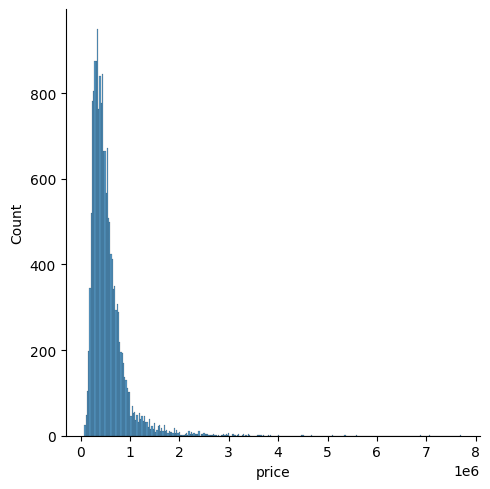

In [27]:
import seaborn as sns
import numpy as np
sns.displot(train_set.price)

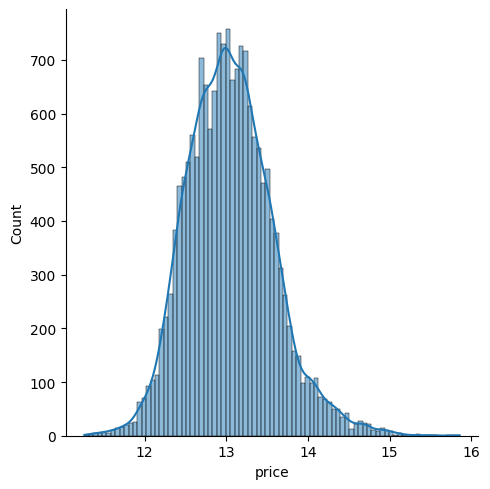

In [28]:
sns.displot(np.log(train_set.price), kde=True)

## 전처리 함수 작성

In [29]:
from sklearn.preprocessing import MinMaxScaler

def my_preprocess(org_df, target="train", scaler=None):
    df = org_df.copy()
    df.drop(columns=["id", "date", "zipcode"], inplace=True)
    if target == "train":
        sc = MinMaxScaler()
        df = sc.fit_transform(df)
        return df, sc
    elif target == "test":
        sc = scaler
        df = sc.transform(df)
        return df

## 독립, 종속변수 분할

In [30]:
X = train_set.drop(columns="price")
y = train_set["price"]
log_y = np.log(y)

## K-fold validation split

In [31]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=10)
X_trains, X_vals, y_trains, y_vals = [[], [], [], []]
for train_idx, val_idx in kf.split(X, y):
    X_trains.append(X.iloc[train_idx])
    X_vals.append(X.iloc[val_idx])
    y_trains.append(log_y.iloc[train_idx])
    y_vals.append(log_y.iloc[val_idx])

## 전처리 시행

In [32]:
X_trains_proc = []
X_vals_proc = []
for i in range(5):
    train_temp, sc = my_preprocess(X_trains[i])
    X_trains_proc.append(train_temp)
    X_vals_proc.append(my_preprocess(X_vals[i], target="test", scaler=sc))

## 분석

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import tensorflow as tf

from sklearn.metrics import r2_score, mean_squared_error

### 선형회귀

In [34]:
r2_lr = []
mse_lr = []
for i in range(5):
    model_lr = LinearRegression()
    model_lr.fit(X_trains_proc[i], y_trains[i])
    pred = model_lr.predict(X_vals_proc[i])
    r2_lr.append(r2_score(y_vals[i], pred))
    mse_lr.append(mean_squared_error((y_vals[i]), (pred)))

print(sum(r2_lr) / 5)
print(sum(mse_lr) / 5)

0.7675009900266007
0.06513768219880949


### 라쏘

In [35]:
r2_lasso = []
mse_lasso = []
for i in range(5):
    model_lasso = Lasso(alpha=0.001, max_iter=100000)
    model_lasso.fit(X_trains_proc[i], y_trains[i])
    pred = model_lasso.predict(X_vals_proc[i])
    r2_lasso.append(r2_score(y_vals[i], pred))
    mse_lasso.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_lasso) / 5)
print(sum(mse_lasso) / 5)

0.76489009403233
0.06587031280327713


### 릿지

In [36]:
r2_ridge = []
mse_ridge = []
for i in range(5):
    model_ridge = Ridge(alpha=0.001, max_iter=100000)
    model_ridge.fit(X_trains_proc[i], y_trains[i])
    pred = model_ridge.predict(X_vals_proc[i])
    r2_ridge.append(r2_score(y_vals[i], pred))
    mse_ridge.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_ridge) / 5)
print(sum(mse_ridge) / 5)

0.7675010362452792
0.06513766869900459


### 랜덤포레스트

In [43]:
for k in range(2, 21):
    r2_rf = []
    mse_rf = []
    for i in range(5):
        model_rf = RandomForestRegressor(max_depth=k, random_state=10)
        model_rf.fit(X_trains_proc[i], y_trains[i])
        pred = model_rf.predict(X_vals_proc[i])
        r2_rf.append(r2_score(y_vals[i], pred))
        mse_rf.append(mean_squared_error(y_vals[i], pred))

    print(k)
    print(sum(r2_rf) / 5)
    print(sum(mse_rf) / 5)

2
0.5717260143074141
0.12002924889318296
3
0.6910342376472451
0.0865928019072703
4
0.7464311713973031
0.0710736220464808
5
0.7887164832998457
0.05921656336715493
6
0.8159660308570011
0.05157900984041245
7
0.8382253346918238
0.04533659205296563
8
0.8544400733149418
0.040789149871113754
9
0.8653952849800424
0.03771901246964422
10
0.8724271001653076
0.03574855726120063
11
0.877100669739009
0.03443854720116235
12
0.8799685371947398
0.03363315002247173
13
0.8818593026178672
0.033103306182873465
14
0.8828575166299887
0.032823077457667764
15
0.8832459330656823
0.03271414446329374
16
0.8833332818413628
0.03268936148968438
17
0.8832590244379219
0.03271110875625667
18
0.8832406243725573
0.032715618947928266
19
0.883364893216107
0.032680725767689774
20
0.8834222405157425
0.03266432941478931


In [44]:
r2_rf = []
mse_rf = []
for i in range(5):
    model_rf = RandomForestRegressor(max_depth=20, random_state=10)
    model_rf.fit(X_trains_proc[i], y_trains[i])
    pred = model_rf.predict(X_vals_proc[i])
    r2_rf.append(r2_score(y_vals[i], pred))
    mse_rf.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_rf) / 5)
print(sum(mse_rf) / 5)

0.8834222405157425
0.03266432941478931


In [45]:
r2_rf

[0.8847633810775407,
 0.874401926267077,
 0.883238432998229,
 0.8864907470906014,
 0.8882167151452648]

### AdaBoost

In [65]:
r2_ab = []
mse_ab = []
for i in range(5):
    model_ab = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=10)
    model_ab.fit(X_trains_proc[i], y_trains[i])
    pred = model_ab.predict(X_vals_proc[i])
    r2_ab.append(r2_score(y_vals[i], pred))
    mse_ab.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_ab) / 5)
print(sum(mse_ab) / 5)

0.7622487900334229
0.06663484622257912


### LightGBM

In [59]:
r2_lgbm = []
mse_lgbm = []
for i in range(5):
    model_lgbm = LGBMRegressor(boosting_type="dart", n_estimators=45)
    model_lgbm.fit(X_trains_proc[i], y_trains[i])
    pred = model_lgbm.predict(X_vals_proc[i])
    r2_lgbm.append(r2_score(y_vals[i], pred))
    mse_lgbm.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_lgbm) / 5)
print(sum(mse_lgbm) / 5)

0.8736592086411115
0.0353990654668359


### XGBoost

In [87]:
r2_xgb = []
mse_xgb = []
for i in range(5):
    model_xgb = XGBRegressor(max_depth=7, n_estimators=70)
    model_xgb.fit(X_trains_proc[i], y_trains[i])
    pred = model_xgb.predict(X_vals_proc[i])
    r2_xgb.append(r2_score(y_vals[i], pred))
    mse_xgb.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_xgb) / 5)
print(sum(mse_xgb) / 5)

0.892187305235262
0.03020211594067716


In [88]:
r2_score(np.exp(y_vals[4]), np.exp(pred))

0.8915045479541638

<Axes: ylabel='price'>

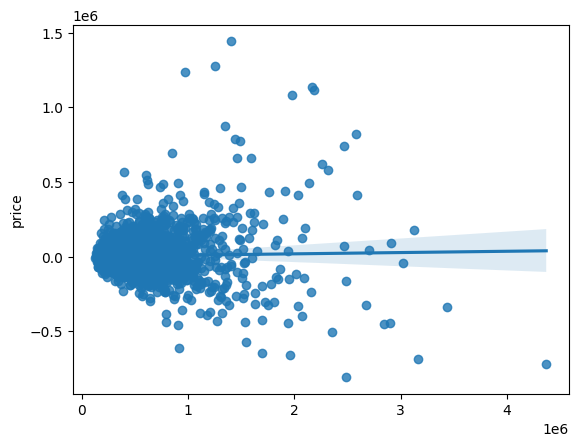

In [100]:
res = np.exp(y_vals[4]) - np.exp(pred)
sns.regplot(x=np.exp(pred), y=res)

### ANN

In [82]:
def build_ann():
    ann = tf.keras.Sequential()
    ann.add(tf.keras.layers.Dense(64, activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(64, activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(64, activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))
    ann.compile(optimizer="adam", loss=tf.keras.losses.mean_squared_error, metrics=["mean_squared_error"])
    return ann

In [83]:
r2_ann = []
mse_ann = []
for i in range(5):
    model_ann = build_ann()
    model_ann.fit(X_trains_proc[i], y_trains[i], batch_size=32, epochs=100, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10), verbose=0)
    pred = model_ann.predict(X_vals_proc[i])
    r2_ann.append(r2_score(y_vals[i], pred))
    mse_ann.append(mean_squared_error(y_vals[i], pred))

print(sum(r2_ann) / 5)
print(sum(mse_ann) / 5)

109/109 [==============================] - 0s 2ms/step
0.8182825839947491
0.050953397889005415


## XGBoost의 성능이 가장 좋음

In [84]:
train_proc, sc = my_preprocess(X)
test_proc = my_preprocess(test_set, target="test", scaler=sc)

In [86]:
final_model = XGBRegressor(max_depth=7, n_estimators=70)
final_model.fit(train_proc, log_y)
test_pred = final_model.predict(test_proc)
test_pred = np.exp(test_pred)
pd.DataFrame(test_pred).to_csv("submission_pred.csv")